In [1]:
import os
os.chdir('..')

In [121]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

from src.data_exploration.data_exploration import *

In [3]:
!cd

C:\Users\raffa\PycharmProjects\ML1


**Loading the raw dataset from the local DB**

In [4]:
df = read_sqlite_table('housedata', './data/raw/rome_house_raw.db')

**Check None values per column**

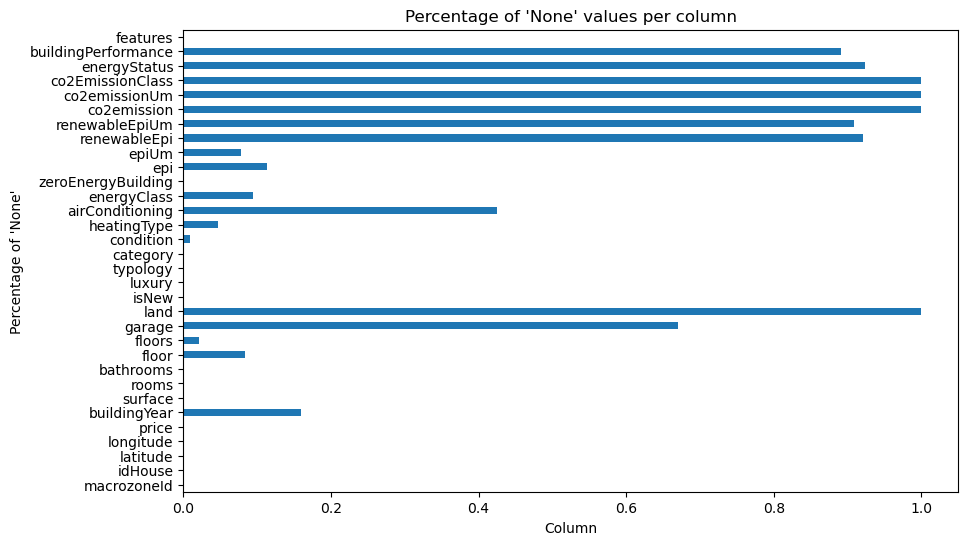

In [5]:
plot_value_percentages(df, 'None')

**Replace None with 0 for garage variable**

In [6]:
# Utilizza il metodo str.slice() per estrarre i primi due caratteri della colonna 'garage'
df['garage'] = df['garage'].str.slice(stop=2)

# Sostituisci i valori 'No' con '0'
df['garage'] = df['garage'].replace('No', '0')

# Converti la colonna 'garage' in dtype intero
df['garage'] = df['garage'].astype(int)

**Drop variables with high percentage of None values**

In [7]:
cols_to_drop = ['land', 'buildingPerformance', 'energyStatus', 'co2EmissionClass', 'co2emission',
                'co2emissionUm', 'renewableEpiUm', 'renewableEpi']
df = df.drop(cols_to_drop,axis = 1)

**Replace None with nan values**

In [8]:
df = replace_value_with_nan(df, 'None')

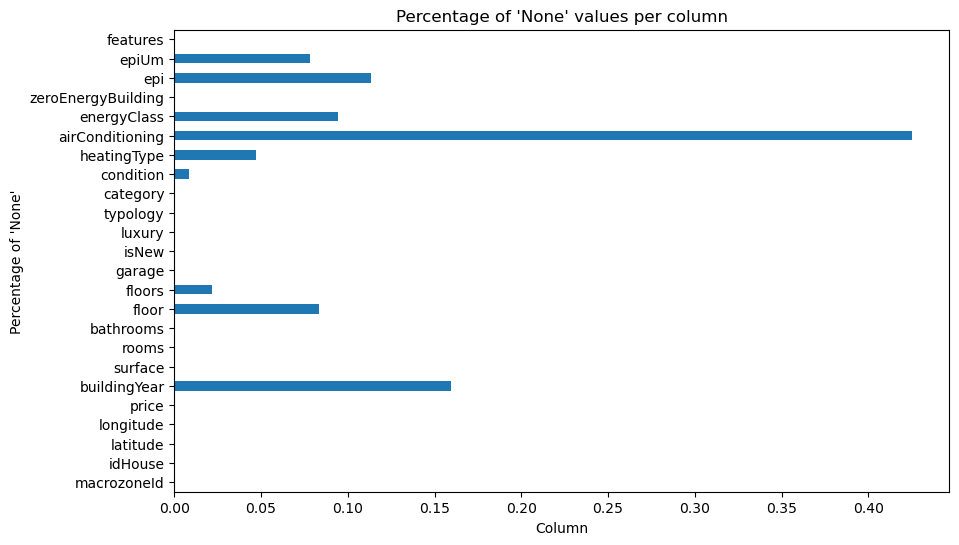

In [8]:
plot_value_percentages(df, 'None')

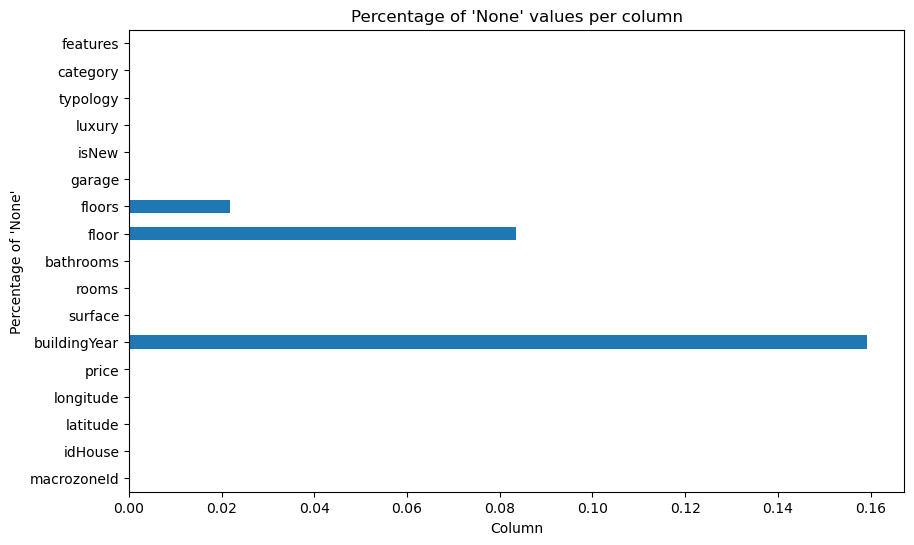

In [11]:
cols_to_drop = ['epiUm', 'epi', 'energyClass', 'airConditioning', 'heatingType', 'condition','zeroEnergyBuilding']
df1 = df.copy()
df1 = df1.drop(cols_to_drop,axis = 1)
plot_value_percentages(df1, 'None')

In [12]:
df1.shape

(15703, 17)

In [13]:
df1 = df1[df1['latitude']!='None']

In [14]:
df1.shape

(15702, 17)

In [15]:
df1['latitude'] = df1['latitude'].astype('float32')

In [16]:
df1['longitude'] = df1['longitude'].astype('float32')

In [17]:
df1['buildingYear'] = df1['buildingYear'].replace('None', '0')

# Converti la colonna 'garage' in dtype intero
df1['buildingYear'] = df1['buildingYear'].astype(int)

In [18]:
df2 = df1[df1['buildingYear']!=0].copy().reset_index(drop=True)
df3 = df1[df1['buildingYear']==0].copy().reset_index(drop=True)
for i in range(len(df3)):
    df2['lat_check'] = df3.loc[i,'latitude']
    df2['lon_check'] = df3.loc[i,'longitude']
    df2['lat_distance'] = (df2['lat_check']-df2['latitude'])**2
    df2['lon_distance'] = (df2['lon_check']-df2['longitude'])**2
    df2['distance'] = (df2['lat_distance']+df2['lon_distance'])**0.5
    df3.loc[i,'buildingYear'] = np.floor(df2[df2['distance']== df2['distance'].min()]['buildingYear'].mean())
    df3.loc[i,'distance'] = df2['distance'].min()

In [19]:
pd.unique(df3['buildingYear'])

array([1963, 1990, 1970, 1950, 1700, 1960, 1959, 1982, 1938, 1957, 1930,
       1964, 1967, 1962, 1931, 1973, 1965, 1966, 1955, 1972, 1953, 1958,
       1986, 1961, 1980, 1981, 1968, 1975, 1989, 1978, 1996, 1985, 1969,
       1956, 1993, 1900, 1998, 1988, 1974, 1759, 1991, 2000, 1111, 1549,
       2001, 1987, 1997, 2009, 1992, 2004, 1876, 1995, 2010, 2024, 2005,
       1869, 2003, 1927, 2006, 1971, 2021, 2008, 2014, 2017, 2007, 2022,
       1901, 2020, 2018, 1910, 1929, 2002, 2015, 2016, 2013, 1976, 2023,
       2012, 1936, 1979, 2011, 1940, 1999, 1977, 1919, 1984, 1954, 1920,
       1939, 2019, 1752, 1887, 1983, 1866, 1942, 1925, 1935, 1926, 1994,
       1915, 1949, 1943, 1941, 1948, 1952, 1600, 1907, 1500, 1871, 1800,
       1944, 1928, 1947, 1550, 1917, 1945, 1932, 1937, 1916, 1888, 1934,
       1912, 1946, 1890, 1872, 1750, 1713, 1400, 1650, 1830, 1740, 1882,
       1904, 1875, 1816, 1820, 1840, 1562, 1492, 1896, 1480, 1825, 1895,
       1886, 1881])

In [20]:
df3['distance_km'] = df3['distance']*60*1.852
df3['distance_km'].max()

1.0711162669211627

In [21]:
df2.shape

(13202, 22)

In [22]:
df3.shape

(2500, 19)

In [24]:
df2.columns

Index(['macrozoneId', 'idHouse', 'latitude', 'longitude', 'price',
       'buildingYear', 'surface', 'rooms', 'bathrooms', 'floor', 'floors',
       'garage', 'isNew', 'luxury', 'typology', 'category', 'features',
       'lat_check', 'lon_check', 'lat_distance', 'lon_distance', 'distance'],
      dtype='object')

In [25]:
df3.columns

Index(['macrozoneId', 'idHouse', 'latitude', 'longitude', 'price',
       'buildingYear', 'surface', 'rooms', 'bathrooms', 'floor', 'floors',
       'garage', 'isNew', 'luxury', 'typology', 'category', 'features',
       'distance', 'distance_km'],
      dtype='object')

In [27]:
df2 = df2.drop(labels=['lat_check', 'lon_check', 'lat_distance', 'lon_distance', 'distance'], axis=1)
df2.columns

Index(['macrozoneId', 'idHouse', 'latitude', 'longitude', 'price',
       'buildingYear', 'surface', 'rooms', 'bathrooms', 'floor', 'floors',
       'garage', 'isNew', 'luxury', 'typology', 'category', 'features'],
      dtype='object')

In [28]:
df3 = df3.drop(labels=['distance', 'distance_km'], axis=1)
df3.columns

Index(['macrozoneId', 'idHouse', 'latitude', 'longitude', 'price',
       'buildingYear', 'surface', 'rooms', 'bathrooms', 'floor', 'floors',
       'garage', 'isNew', 'luxury', 'typology', 'category', 'features'],
      dtype='object')

In [39]:
df1 = replace_value_with_nan(df1, 'None')
df1 = df1.dropna()

In [30]:
df4 = pd.concat([df2, df3], axis=0, ignore_index=True)
df4.shape

(15702, 17)

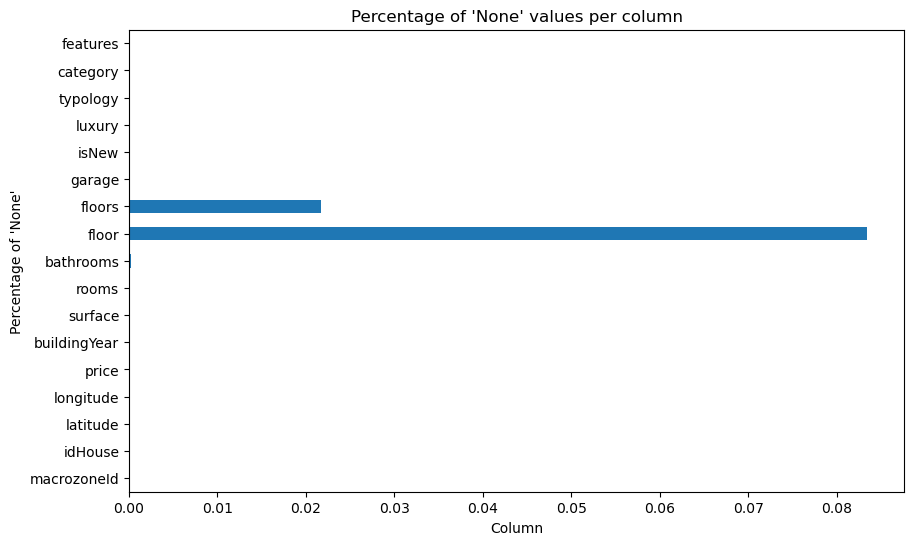

In [31]:
plot_value_percentages(df4, 'None')

In [35]:
pd.unique(df4['floors'])

array(['3 piani', '6 piani', '4 piani', '8 piani', '5 piani', '2 piani',
       '7 piani', '9 piani', '11 piani', '10 piani', '1 piano', 'None',
       '15 piani', '31 piani', '30 piani', '14 piani', '28 piani',
       '27 piani', '13 piani', '18 piani', '16 piani', '12 piani',
       '75 piani'], dtype=object)

In [48]:
for i in range(len(df4['floors'])):
    df4.loc[i,'floors'] = df4.loc[i,'floors'].split(" ")[0]

In [49]:
pd.unique(df4['floors'])

array(['3', '6', '4', '8', '5', '2', '7', '9', '11', '10', '1', 'None',
       '15', '31', '30', '14', '28', '27', '13', '18', '16', '12', '75'],
      dtype=object)

In [50]:
df4['floors'] = df4['floors'].replace('None', '-99')

# Converti la colonna 'garage' in dtype intero
df4['floors'] = df4['floors'].astype(int)

In [58]:
pd.unique(df4['floor'])

array(['S', '4', '3', '1', '5', '5 - 6', '2', 'R', 'T', '8', '7', 'None',
       '9', '6', 'S - T', '8 - 9', '4 - 5', '7 - 8', '6 - 7', '14', '17',
       '16', '1 - 2', '3 - 4', '20', '26', '11', '10', '12', '2 - 3',
       'S2', 'A', '13', '1 - 3', '11 - 12', 'S4', 'T - R', '9 - 10',
       'R - R', '4 - 6', '3 - 5', '1 - 4', 'S3', 'S5'], dtype=object)

In [57]:
df4 = df4[df4['floor']!='M']
df4.shape

(15701, 17)

In [61]:
dict_replacement = {'S' : '-1', '5 - 6':'5.5', 'R':'0.5', 'T':'0', 'None':'-99',
                    'S - T':'-0.5', '8 - 9':'8.5', '4 - 5':'4.5', '7 - 8':'7.5', '6 - 7':'6.5',
                    '1 - 2':'1.5', '3 - 4':'3.5', '2 - 3':'2.5',
                    'S2':'-1', 'A':'99','1 - 3':'2', '11 - 12':'11.5', 'S4':'-1', 'T - R':'0.5', '9 - 10':'9.5',
                    'R - R':'0.5', '4 - 6':'5', '3 - 5':'4', '1 - 4':'2.5', 'S3':'-1', 'S5':'-1'}



In [70]:
df5 = df4.copy()
df5['floor'] = df5['floor'].replace(dict_replacement)
df5['floor'] = df5['floor'].astype(float)

In [71]:
pd.unique(df5['floor'])

array([ -1. ,   4. ,   3. ,   1. ,   5. ,   5.5,   2. ,   0.5,   0. ,
         8. ,   7. , -99. ,   9. ,   6. ,  -0.5,   8.5,   4.5,   7.5,
         6.5,  14. ,  17. ,  16. ,   1.5,   3.5,  20. ,  26. ,  11. ,
        10. ,  12. ,   2.5,  99. ,  13. ,  11.5,   9.5])

In [103]:
df5 = df5[(df5['floors']!=-99) | (df5['floor']!=-99)]
df5.shape

(15643, 17)

In [109]:
df6 = df5.copy()
df6.loc[(df6['floor']==-99), 'floor'] = df6['floors']/2
df6.shape

(15643, 17)

In [110]:
pd.unique(df6['floor'])

array([-1. ,  4. ,  3. ,  1. ,  5. ,  5.5,  2. ,  0.5,  0. ,  8. ,  7. ,
        3.5,  9. ,  6. ,  2.5,  4.5, -0.5,  1.5,  8.5,  7.5,  6.5, 14. ,
       17. , 16. , 20. , 26. , 11. , 10. , 12. , 99. , 13. , 11.5,  9.5])

In [111]:
df6.loc[(df6['floor']==99), 'floor'] = df6['floors']

In [112]:
pd.unique(df6['floor'])

array([-1. ,  4. ,  3. ,  1. ,  5. ,  5.5,  2. ,  0.5,  0. ,  8. ,  7. ,
        3.5,  9. ,  6. ,  2.5,  4.5, -0.5,  1.5,  8.5,  7.5,  6.5, 14. ,
       17. , 16. , 20. , 26. , 11. , 10. , 12. , 13. , 11.5,  9.5])

In [114]:
df7 = df6.copy()
df7 = df7[(df7['features']!='') & (df7['bathrooms']!='None') & (df7['macrozoneId']!='None')]
df7.shape

(15339, 17)

In [128]:
def save_to_sql(path, df, table_name):
    # Connessione al database SQLite
    conn = sqlite3.connect(path)
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    # Chiudere la connessione al database
    conn.close()
    return None

In [130]:
save_to_sql('./data/processed/rome_house_raw.db', df7, 'housedata')

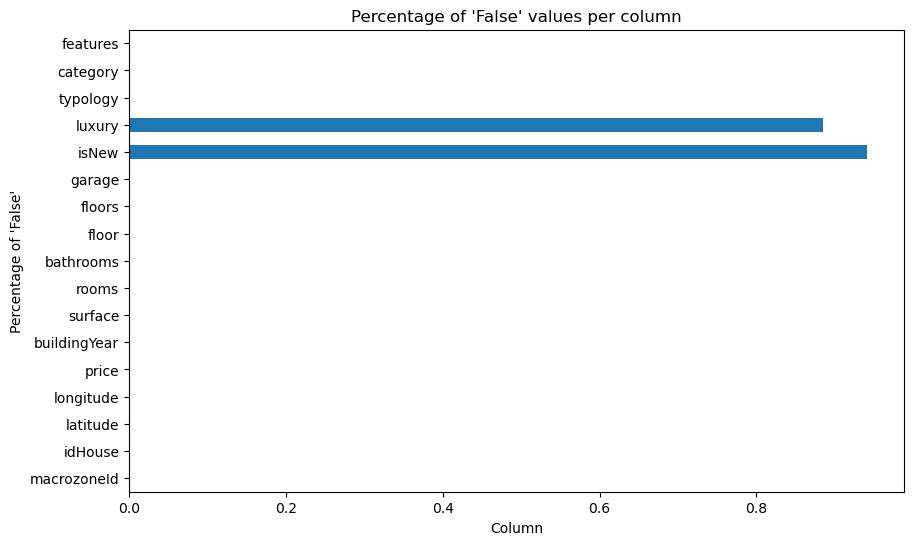

In [120]:
plot_value_percentages(df7, 'False')